<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Emotion_Detect_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This build for my exam my study

i learn how to make a nlp model to anlyse emotion

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

In [41]:
# Load and preprocess dataset (Dataset Link: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)
data = pd.read_csv('/content/train.txt', header=0, sep=';')  # Replace with the dataset path
data.columns = ['Text', 'Emotion']
data.dropna(inplace=True)

In [42]:
data.head()

,Text,Emotion
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [71]:
# Prepare data
X = data['Text']
y = data['Emotion']

In [72]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [73]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.25, random_state=42)

In [83]:
# Train the model using XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:24:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
# Evaluate the model X Boosted
y_pred = model.predict(X_test)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
print(classification_report(y_test_decoded, y_pred_decoded))

              precision    recall  f1-score   support

       anger       0.86      0.85      0.85       531
        fear       0.84      0.82      0.83       481
         joy       0.88      0.91      0.90      1347
        love       0.77      0.84      0.81       334
     sadness       0.95      0.89      0.92      1168
    surprise       0.80      0.76      0.77       139

    accuracy                           0.88      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.88      0.88      0.88      4000



In [65]:
# Train the model
# model = MultinomialNB()
# model.fit(X_train, y_train)

MultinomialNB()

In [66]:
# Evaluate the model
# Since we have placeholder emotions, evaluation might not be meaningful until proper labels are added
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.85      0.52      0.65       450
        fear       0.83      0.48      0.61       389
         joy       0.71      0.95      0.81      1053
        love       0.81      0.21      0.33       261
     sadness       0.71      0.93      0.81       938
    surprise       0.33      0.02      0.03       109

    accuracy                           0.73      3200
   macro avg       0.71      0.52      0.54      3200
weighted avg       0.74      0.73      0.70      3200



In [87]:
# Test single input for analysis
single_input = "I had a lot of problems and I broke some things and screamed a few times in my room, but I wasn't sad."
single_vectorized = vectorizer.transform([single_input])
single_prediction = model.predict(single_vectorized)
single_prediction_decoded = label_encoder.inverse_transform(single_prediction)
print(f"Input: '{single_input}'\nPredicted Mood: {single_prediction_decoded[0]}")

Input: 'I had a lot of problems and I broke some things and screamed a few times in my room, but I wasn't sad.'
Predicted Mood: sadness



Mood Analysis Application
1. Analyze Mood
2. Show All Inputs
3. Visualize Mood Distribution
4. Exit
Enter your choice: 1
Enter a sentence/paragraph: i was feeling a little vain when i did this one
Mood Analysis Result: sadness

Mood Analysis Application
1. Analyze Mood
2. Show All Inputs
3. Visualize Mood Distribution
4. Exit
Enter your choice: 1
Enter a sentence/paragraph: i cant walk into a shop anywhere where i do not feel uncomfortable
Mood Analysis Result: fear

Mood Analysis Application
1. Analyze Mood
2. Show All Inputs
3. Visualize Mood Distribution
4. Exit
Enter your choice: 1
Enter a sentence/paragraph: i like to have the same breathless feeling as a reader eager to see what will happen next
Mood Analysis Result: joy

Mood Analysis Application
1. Analyze Mood
2. Show All Inputs
3. Visualize Mood Distribution
4. Exit
Enter your choice: 2

All User Inputs:
1. i was feeling a little vain when i did this one -> Mood: sadness
2. i cant walk into a shop anywhere where i do not fee

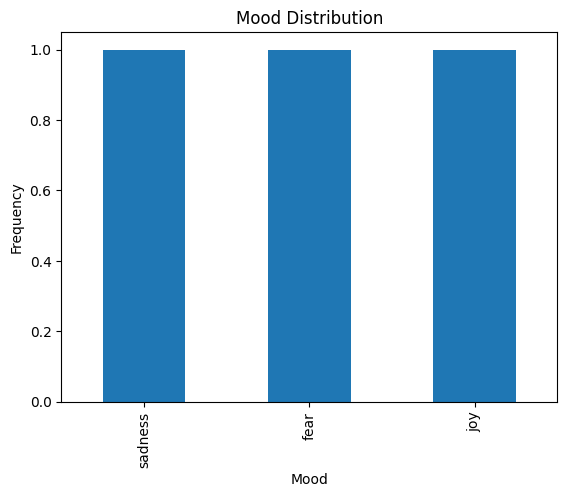


Mood Analysis Application
1. Analyze Mood
2. Show All Inputs
3. Visualize Mood Distribution
4. Exit
Enter your choice: 4
Exiting application. Goodbye!


In [88]:
# Save the model and vectorizer
with open('mood_analysis_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# User Interaction Menu
def analyze_mood(input_text):
    with open('mood_analysis_model.pkl', 'rb') as f:
        model = pickle.load(f)

    with open('vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)

    with open('label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)

    input_vectorized = vectorizer.transform([input_text])
    mood_encoded = model.predict(input_vectorized)
    mood = label_encoder.inverse_transform(mood_encoded)
    return mood[0]

# Store user inputs and results
user_inputs = []
user_results = []

def display_menu():
    while True:
        print("\nMood Analysis Application")
        print("1. Analyze Mood")
        print("2. Show All Inputs")
        print("3. Visualize Mood Distribution")
        print("4. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            user_input = input("Enter a sentence/paragraph: ")
            mood = analyze_mood(user_input)
            user_inputs.append(user_input)
            user_results.append(mood)
            print(f"Mood Analysis Result: {mood}")

        elif choice == '2':
            if user_inputs:
                print("\nAll User Inputs:")
                for i, (input_text, result) in enumerate(zip(user_inputs, user_results), start=1):
                    print(f"{i}. {input_text} -> Mood: {result}")
            else:
                print("No inputs recorded yet.")

        elif choice == '3':
            if user_results:
                mood_counts = pd.Series(user_results).value_counts()
                mood_counts.plot(kind='bar', title='Mood Distribution')
                plt.xlabel('Mood')
                plt.ylabel('Frequency')
                plt.show()
            else:
                print("No data available for visualization.")

        elif choice == '4':
            print("Exiting application. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

# Start application
display_menu()
